In [1]:
%matplotlib inline
from scipy import interpolate, stats
import matplotlib.pyplot as plt
import numpy as np

Отсортированные данные

In [2]:
values = [0.89, 0.95, 0.97, 1.03, 1.05, 1.06, 1.07, 1.08, 1.21, 1.24, 1.25, 1.37, 1.42, 1.42, 1.43, 1.47, 1.54, 1.54,
          1.65, 1.65, 1.84, 1.84, 1.84, 1.85, 1.89, 1.96, 1.98, 1.99, 2]

Расчет Стержесса

In [3]:
k = np.round(1 + 3.322 * np.log10(len(values)))
k

6.0

Длина частичного интервала

In [4]:
h = (max(values) - min(values)) / k
h

0.18499999999999997

Количество банков

In [5]:
interval_borders = [min(values) + h * i for i in range(int(k) + 1)]
banks = []
for i in range(int(k)):
    banks.append(len([val for val in values if interval_borders[i] <= val < interval_borders[i + 1]]))
banks[-1] += 1  # max value
banks

[7, 4, 4, 3, 2, 9]

Накопленная частота

In [6]:
variance = [sum(banks[:i + 1]) for i in range(len(banks))]
variance

[7, 11, 15, 18, 20, 29]

Частности

In [7]:
W = [bank / len(values) * 100 for bank in banks]
W

[24.137931034482758,
 13.793103448275861,
 13.793103448275861,
 10.344827586206897,
 6.896551724137931,
 31.03448275862069]

Относительная плотность

In [8]:
m = [w / h for w in W]
m

[130.475302889096,
 74.5573159366263,
 74.5573159366263,
 55.91798695246972,
 37.27865796831315,
 167.75396085740917]

Визуализация данных

Text(0, 0.5, 'Частоты')

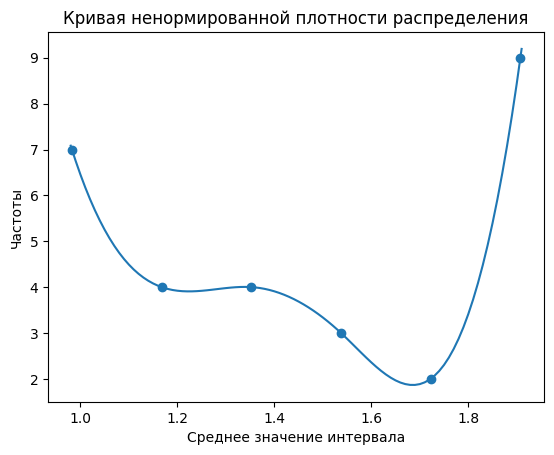

In [9]:
means = [(interval_borders[i] + interval_borders[i + 1]) / 2 for i in range(int(k))]
f = interpolate.interp1d(means, banks, fill_value="extrapolate", kind="cubic")
x = [i / 100 for i in range(98, 192)]
y = [f(x_i) for x_i in x]
plt.plot(x, y)
plt.scatter(means, banks)
plt.title("Кривая ненормированной плотности распределения")
plt.xlabel("Среднее значение интервала")
plt.ylabel("Частоты")

Text(0, 0.5, 'Частоты')

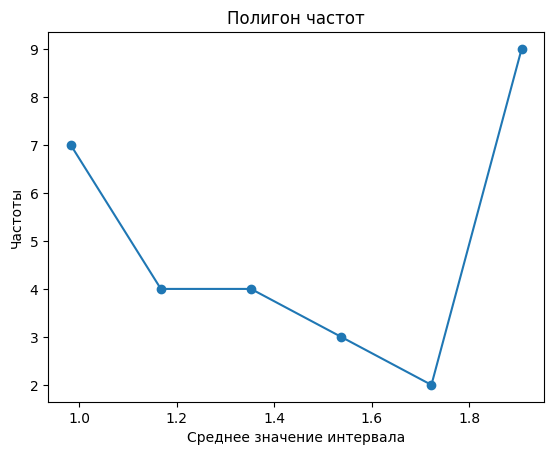

In [10]:
plt.plot(means, banks)
plt.scatter(means, banks)
plt.title("Полигон частот")
plt.xlabel("Среднее значение интервала")
plt.ylabel("Частоты")

Text(0, 0.5, 'Частоты')

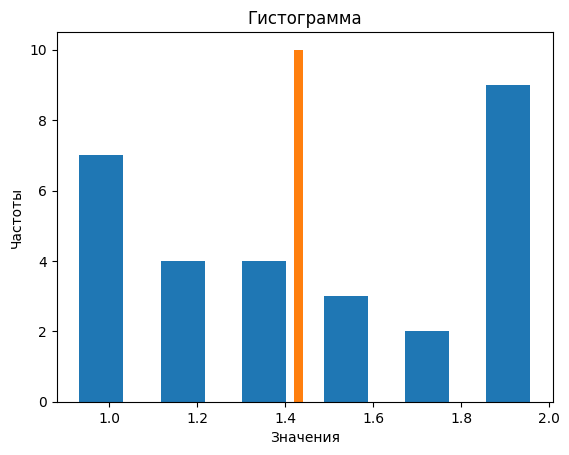

In [11]:
median = np.median(values)

plt.bar(means, banks, width=0.1)
plt.bar(median, 10, width=0.02)
plt.title("Гистограмма")
plt.xlabel("Значения")
plt.ylabel("Частоты")

Text(0, 0.5, 'Накопленная частота')

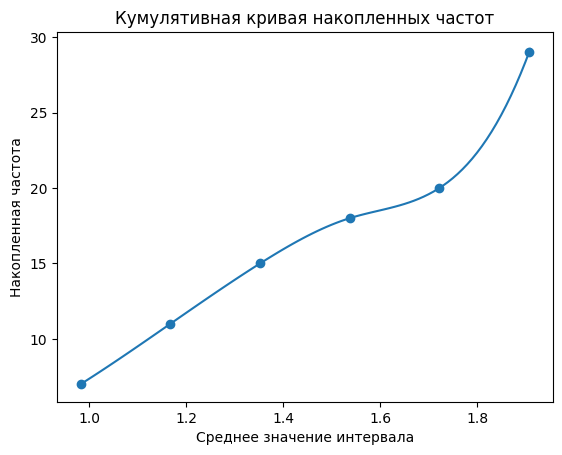

In [12]:
f = interpolate.interp1d(means, variance, fill_value="extrapolate", kind="cubic")
x = [i / 100 for i in range(98, 192)]
y = [f(x_i) for x_i in x]
plt.plot(x, y)
plt.scatter(means, variance)
plt.title("Кумулятивная кривая накопленных частот")
plt.xlabel("Среднее значение интервала")
plt.ylabel("Накопленная частота")

Средняя арифметическая ряда

In [13]:
mean_x = np.mean(values)
mean_x

1.4648275862068965

Средняя арифметическая (интервальная)

In [14]:
mean_banks = sum([mn * bank for mn, bank in zip(means, banks)]) / sum(banks)
mean_banks

1.4545689655172416

Медиана

In [47]:
med = np.median(values)
med

1.43

Мода

In [16]:
mode = stats.mode(values)[0][0]
mode

1.84

Размах вариации

In [17]:
R = max(values) - min(values)
R

1.1099999999999999

Среднее линейное отклонение

In [18]:
d = sum([abs(x - mean_x) for x in values]) / len(values)
d

0.3125802615933413

Дисперсия

In [19]:
dispersion = np.var(values)
dispersion

0.12928703923900117

Среднее квадратичное отклонение

In [20]:
sqd = np.std(values)
sqd

0.3595650695479209

Квартили

In [21]:
import statistics as st

quartiles = [min(values)]
for quartile in st.quantiles(values):
    quartiles.append(quartile)
quartiles.append(max(values))
quartiles

[0.89, 1.0750000000000002, 1.43, 1.84, 2]

Квартильное отклонение

In [22]:
quart_dev = (quartiles[3] - quartiles[1]) / 2
quart_dev

0.38249999999999995

Для симметричных или мало-асимметричных распределений квартильное отклонение приблизительно равно следующему:

In [23]:
2 / 3 * sqd

0.2397100463652806

Коэффициент осцилляции

In [24]:
k_osc = R / mean_x * 100
k_osc

75.77683615819208

Относительное линейное отклонение

In [25]:
k_lindev = d / mean_x * 100
k_lindev

21.33904799012923

Коэффициент вариации

In [26]:
k_var = sqd / mean_x * 100
k_var

24.546579606614184

Относительный показатель квартильной вариации

In [27]:
k_quartvar = quart_dev / median
k_quartvar

0.26748251748251745

Начальные моменты

In [28]:
start_moments = []

for a in range(1, 5):
    temp = [(x ** a) * b for x, b in zip(means, banks)]
    start_moments.append(sum(temp) / sum(banks))

start_moments

[1.4545689655172416, 2.251694181034482, 3.672083147090517, 6.2365983062244075]

Центральные моменты

In [29]:
from scipy.stats import moment as central_moment

central_moments = [central_moment(values, a) for a in range(1, 5)]
central_moments

[0.0, 0.12928703923900117, 0.001286213128869612, 0.027311323574534023]

Немного проверок:

In [30]:
print(f'Начальный момент 1 порядка: {start_moments[0]}; средняя арифметическая банков: {mean_banks}')
print(f'Центральный момент 1 порядка: {central_moments[0]}')
print(f'Центральный момент 2 порядка: {central_moments[1]}; дисперсия: {dispersion}')

Начальный момент 1 порядка: 1.4545689655172416; средняя арифметическая банков: 1.4545689655172416
Центральный момент 1 порядка: 0.0
Центральный момент 2 порядка: 0.12928703923900117; дисперсия: 0.12928703923900117


Асимметрия

In [31]:
asymmetry = central_moments[2] / (sqd ** 3)
asymmetry

0.02766817114409513

Проверка асимметрии

In [32]:
N = len(values)
sqd_asym = np.sqrt(6 * (N - 1) / (N + 1) * (N + 3))
print(f'{abs(asymmetry) / sqd_asym} > 3 == {abs(asymmetry) / sqd_asym > 3}')

0.002066861857461426 > 3 == False


Эксцесс

In [33]:
excess = (central_moments[3] / sqd ** 4) - 3
excess

-1.3660725545457184

Проверка эксцесса

In [34]:
sqd_excess = np.sqrt((24 * N * (N - 2) * (N - 3)) / (((N - 1) ** 2) * (N + 3) * (N + 5)))
sqd_excess

0.7568341093976004

Попытаемся построить кривую нормального распределения

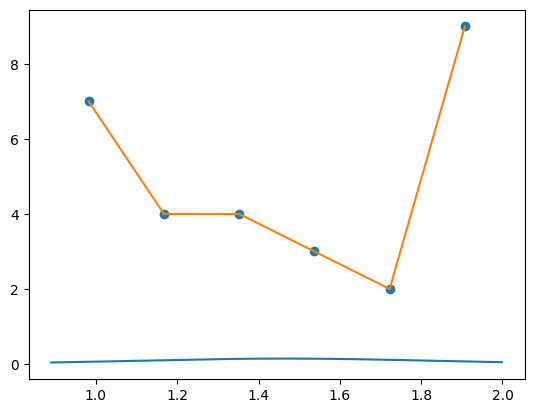

In [44]:
def normal_gr(x, meanx, var):
    a = (1 / np.sqrt(2 * np.pi) * sqd)
    b = np.e ** (-((x - meanx)**2)/(2 * var))
    return a * b

X = [i/1000 for i in range(round(min(values)*1000), round(max(values)*1000))]
Y = [normal_gr(coord, mean_x, dispersion) for coord in X]

plt.plot(X, Y)
plt.plot(means, banks)
plt.scatter(means, banks)

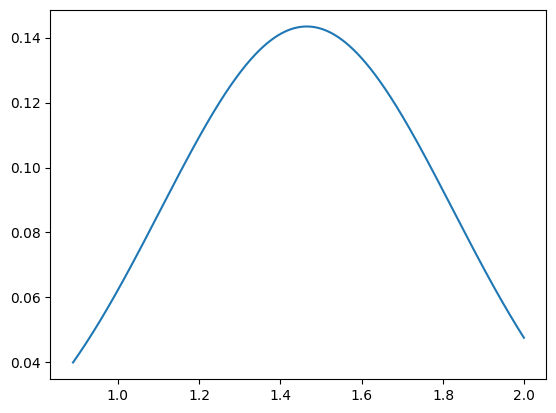

In [45]:
plt.plot(X, Y)

Вывод:

- Коэффициент асимметрии мал (0,027), его отношение к среднеквадратичному отклонению также невелико (существенно
    менее 3).Значение коэффициента асимметрии положительно -> имеем дело с правосторонней асимметрией. О низкой
    асимметрии свидетельствует также близость значений медианы и среднего значения и достаточно равномерного
    распределения квартилей.

- Эксцесс отрицателен -> распределение плосковершинное, сильно отличающееся от нормального (-1,36 << 3).

- Коэффициент вариации порядка 24%, что свидетельствует о достаточно однородной выборке (так как менее 33%)

- Были проведены проверки правильности расчётов:
        1) Центральный момент 1 порядка равен нулю
        2) Центральный момент 2 порядка равен дисперсии
        3) Начальный момент 1 порядка равен среднему арифметическому
        4) Второй квартиль равен медиане